In [7]:
import pandas as pd

In [8]:
df=pd.read_csv('Weather Data.csv')

In [9]:
df.head(2)

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather
0,1/1/2012 0:00,-1.8,-3.9,86,4,8.0,101.24,Fog
1,1/1/2012 1:00,-1.8,-3.7,87,4,8.0,101.24,Fog


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date/Time         8784 non-null   object 
 1   Temp_C            8784 non-null   float64
 2   Dew Point Temp_C  8784 non-null   float64
 3   Rel Hum_%         8784 non-null   int64  
 4   Wind Speed_km/h   8784 non-null   int64  
 5   Visibility_km     8784 non-null   float64
 6   Press_kPa         8784 non-null   float64
 7   Weather           8784 non-null   object 
dtypes: float64(4), int64(2), object(2)
memory usage: 549.1+ KB


In [11]:
df.shape

(8784, 8)

In [12]:
df=df.iloc[:,1:]

In [13]:
df.head()

,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather
0,-1.8,-3.9,86,4,8.0,101.24,Fog
1,-1.8,-3.7,87,4,8.0,101.24,Fog
2,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
3,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
4,-1.5,-3.3,88,7,4.8,101.23,Fog


In [14]:
df.shape

(8784, 7)

In [15]:
df.Weather.value_counts()

Weather
Mainly Clear                               2106
Mostly Cloudy                              2069
Cloudy                                     1728
Clear                                      1326
Snow                                        390
Rain                                        306
Rain Showers                                188
Fog                                         150
Rain,Fog                                    116
Drizzle,Fog                                  80
Snow Showers                                 60
Drizzle                                      41
Snow,Fog                                     37
Snow,Blowing Snow                            19
Rain,Snow                                    18
Thunderstorms,Rain Showers                   16
Haze                                         16
Drizzle,Snow,Fog                             15
Freezing Rain                                14
Freezing Drizzle,Snow                        11
Freezing Drizzle                

In [16]:
# df['Weather'].replace({"Mostly Cloudy":"Cloudy","Cloudy":"Cloudy","Mainly Clear":"Clear","Snow Shower":"Snow","Snow,Ice Pellets":"Snow"})

In [17]:
df.Weather=df.Weather.apply(lambda x:'Cloudy'.lower() if 'Cloudy' in x else x)

In [18]:
df.Weather=df.Weather.apply(lambda x:'Snow'.lower() if 'Snow' in x else x)

In [19]:
df.Weather=df.Weather.apply(lambda x:'Rain'.lower() if 'Rain' in x else x)

In [20]:
df.Weather=df.Weather.apply(lambda x:'Clear'.lower() if 'Clear' in x else x)
df.Weather=df.Weather.apply(lambda x:'Fog'.lower() if 'Fog' in x else x)

In [21]:
df.Weather=df.Weather.apply(lambda x:'Other'.lower() if x in['Drizzle','Haze','Freezing Drizzle','Freezing Drizzle,Haze','Thunderstorms']  else x)

In [22]:
df.Weather.value_counts()

Weather
cloudy    3797
clear     3432
rain       662
snow       583
fog        241
other       69
Name: count, dtype: int64

In [23]:
df.head()

,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather
0,-1.8,-3.9,86,4,8.0,101.24,fog
1,-1.8,-3.7,87,4,8.0,101.24,fog
2,-1.8,-3.4,89,7,4.0,101.26,fog
3,-1.5,-3.2,88,6,4.0,101.27,fog
4,-1.5,-3.3,88,7,4.8,101.23,fog


In [24]:
df.sample(5)

,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather
6678,13.7,12.9,95,4,16.1,100.93,clear
6611,16.6,13.9,84,7,24.1,101.08,cloudy
5845,24.0,18.2,70,22,24.1,100.43,cloudy
5447,21.7,17.8,79,4,25.0,100.64,cloudy
5778,20.0,7.3,44,20,48.3,100.79,clear


In [25]:
df.isna().sum()

Temp_C              0
Dew Point Temp_C    0
Rel Hum_%           0
Wind Speed_km/h     0
Visibility_km       0
Press_kPa           0
Weather             0
dtype: int64

In [26]:
df.duplicated().sum()

0

In [27]:
X=df.drop('Weather',axis=1)

In [28]:
y=df['Weather']

In [29]:
from sklearn.preprocessing import LabelEncoder

In [31]:
le=LabelEncoder()
y=le.fit_transform(y)


In [32]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [33]:
X_train,X_test,y_train,y_test=train_test_split(X,y ,test_size=.30,random_state=123)

In [34]:
X_train.shape , y_test.shape

((6148, 6), (2636,))

In [35]:
lr=LogisticRegression()

In [36]:
lr.fit(X_train,y_train)

C:\Users\Saqib Brohi\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [37]:
y_pred=lr.predict(X_train)

In [38]:
y_pred_test=lr.predict(X_test)

In [39]:
from sklearn.metrics import confusion_matrix,classification_report

In [40]:
confusion_matrix(y_train,y_pred)

array([[1272, 1101,    1,    0,    9,   11],
       [ 863, 1706,    2,    0,   78,   24],
       [   0,    0,  108,    0,   34,   29],
       [   1,   17,    3,    0,   12,   13],
       [  18,  223,   48,    0,  147,   33],
       [  11,   95,   23,    0,    7,  259]], dtype=int64)

In [41]:
print(classification_report(y_train,y_pred))

              precision    recall  f1-score   support

           0       0.59      0.53      0.56      2394
           1       0.54      0.64      0.59      2673
           2       0.58      0.63      0.61       171
           3       0.00      0.00      0.00        46
           4       0.51      0.31      0.39       469
           5       0.70      0.66      0.68       395

    accuracy                           0.57      6148
   macro avg       0.49      0.46      0.47      6148
weighted avg       0.57      0.57      0.56      6148



C:\Users\Saqib Brohi\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Saqib Brohi\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Saqib Brohi\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [42]:
print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

           0       0.60      0.54      0.57      1038
           1       0.55      0.65      0.59      1124
           2       0.59      0.71      0.65        70
           3       0.00      0.00      0.00        23
           4       0.58      0.36      0.44       193
           5       0.73      0.61      0.66       188

    accuracy                           0.58      2636
   macro avg       0.51      0.48      0.49      2636
weighted avg       0.58      0.58      0.57      2636



C:\Users\Saqib Brohi\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Saqib Brohi\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Saqib Brohi\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [43]:
from sklearn.tree import DecisionTreeClassifier

In [44]:
dt=DecisionTreeClassifier(max_depth=5)

In [45]:
dt.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=5)

In [46]:
pred_dt=dt.predict(X_train)

In [47]:
pred_dt_test=dt.predict(X_test)

In [48]:
print(classification_report(y_train,pred_dt))

              precision    recall  f1-score   support

           0       0.63      0.68      0.65      2394
           1       0.62      0.62      0.62      2673
           2       0.72      0.79      0.75       171
           3       0.50      0.13      0.21        46
           4       0.59      0.42      0.49       469
           5       0.80      0.67      0.73       395

    accuracy                           0.63      6148
   macro avg       0.64      0.55      0.57      6148
weighted avg       0.63      0.63      0.63      6148



In [49]:
print(classification_report(y_test,pred_dt_test))

              precision    recall  f1-score   support

           0       0.63      0.67      0.65      1038
           1       0.60      0.63      0.62      1124
           2       0.61      0.63      0.62        70
           3       0.25      0.04      0.07        23
           4       0.54      0.40      0.46       193
           5       0.77      0.60      0.67       188

    accuracy                           0.62      2636
   macro avg       0.57      0.50      0.52      2636
weighted avg       0.62      0.62      0.62      2636



## Model Evaluation
Evaluate model performance for different `max_depth` values and compare train/test accuracy.

Depth=1, Train Acc=0.464, Test Acc=0.463
Depth=2, Train Acc=0.536, Test Acc=0.542
Depth=3, Train Acc=0.583, Test Acc=0.583
Depth=4, Train Acc=0.601, Test Acc=0.599
Depth=5, Train Acc=0.632, Test Acc=0.622
Depth=6, Train Acc=0.649, Test Acc=0.618
Depth=7, Train Acc=0.673, Test Acc=0.632
Depth=8, Train Acc=0.703, Test Acc=0.640
Depth=9, Train Acc=0.736, Test Acc=0.631
Depth=None, Train Acc=1.000, Test Acc=0.630


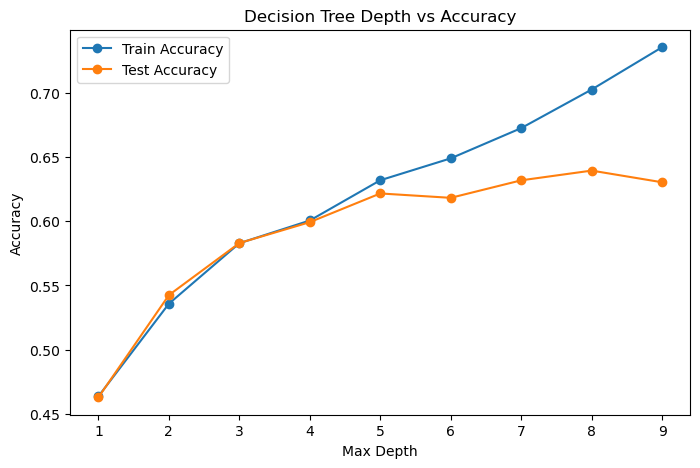

In [51]:

from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

train_accuracies = []
test_accuracies = []
depths = list(range(1, 10)) + [None]

for depth in depths:
    clf = DecisionTreeClassifier(max_depth=depth, random_state=42)
    clf.fit(X_train, y_train)
    train_acc = clf.score(X_train, y_train)
    test_acc = clf.score(X_test, y_test)
    train_accuracies.append(train_acc)
    test_accuracies.append(test_acc)
    print(f"Depth={depth}, Train Acc={train_acc:.3f}, Test Acc={test_acc:.3f}")

plt.figure(figsize=(8,5))
plt.plot(depths[:-1], train_accuracies[:-1], label='Train Accuracy', marker='o')
plt.plot(depths[:-1], test_accuracies[:-1], label='Test Accuracy', marker='o')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.title('Decision Tree Depth vs Accuracy')
plt.legend()
plt.show()


## Analysis & Conclusion
From the above graph, you can analyze how increasing `max_depth` affects overfitting and generalization.
- Shallow trees (small depth) underfit the data → lower train and test accuracy.
- Very deep trees overfit → high train but lower test accuracy.
- The best depth is usually where train and test accuracy are balanced and both are reasonably high.
